  #         Telecom Customer Churn and Revenue
  #                      Prediction using Python


# Problem Statement:
 Use the given dataset to recognize the features to build a ML model that can predict
 whether a customer is going to churn out or remain in the company.
Also, if the customer remains with the company then build a model to predict the
possible revenue that company can generate from them

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model

In [3]:
cust_df=pd.read_csv(r'C:\Users\PC\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

we have load the data file,for reading csv_file we have called 'read_csv' present in pandas ,here 'r' is written before the path

in read_csv because  as we know, Path names on Windows tend to have backslashes in them. But we want them to mean actual 

backslashes, not special characters.

so for this we have to use 'r'.

r stands for "raw" and will cause backslashes in the string to be interpreted as actual backslashes rather than special 

characters.

In [4]:
cust_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


By the 'head' function we have displayed top 5 data values 

In [5]:
cust_df.shape

(7043, 21)

'shape' tells us how many rows we have and how many columns we have as we can see in output that 7043 are no.of rows and 21 are no.of columns

In [6]:
cust_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

By columns we have diaplayed the name of columns or we can say features of our ml model

In [7]:
cust_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

now we have checked datatypes of each column

In [8]:
cust_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


basically describe fuction helps to give some stastitical type description for numerical values like mean,count etc, 
# but you can have a doubt that why only we are able to see only three features decription in output ,what about remaining as 
# only these  three are float or int type but other are object datatype that's why ...


# Following  Insights from above desription :
1. As we can see for Seniorcitizen 25%,50%,75% distribution are improper because 'seniorcitizen' is of categorical datatype 
   not numerical datatype.
2.   75% customer have tenure less than 55 months
3.  Average monthly charges are 64.76 ...., these type of more insights we can conclude from o=above discription.


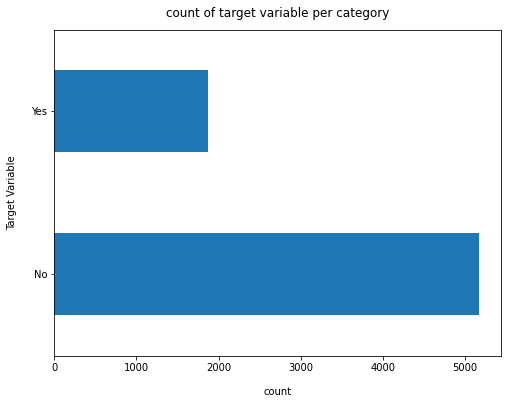

In [9]:
# As our target variable is Churn so we will try to focus more on churner's characteristic 
cust_df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("count", labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title('count of target variable per category',y=1.02);

Above I have just try to represent the churner's ratio visually Churner's ratio means how many percentage of customers are churners or non churners ,but above as we are not able to see the exact percentage of churner or non-churner so ,

for this I am writing the code below.

In [10]:
cust_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Above we have represented the total no. of churner or non-churner,as NO means 5174 are non churner and Yes means 1869 are churner

In [11]:
100*cust_df['Churn'].value_counts()/(len(cust_df['Churn']))

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Above I have shown in percentage form that how many percent of churners or non churner are there :
AS we can see data is too insignifiacnt as the no.of churner as compared to non_churner is very less.

# NOw why I said that above data is insignificant on inbalanced what it mean?

 let me give you example , let there are two different species of animal and our model is classified as : first type belong to     class A ,second type of class B
 
 Class A type animals are 90 whereas class B animal are 10 so we can say that our model having more traits of class A as compared to class B so somewhat we can say this is inbalanced .

 # just explore more about inbalanced data problem
# Now how can we deal with inbalanced data:
->  There are two ways:
 1. upsampling
 2. downsampling
 
    now what are upsampling and downsampling ?
     let in our case there are there are 73 non churner and 26 churner
     
     let assume  there are  5000 records of non churners and 2000 records on churner so what we can do we can create 3000 more 
     synthetic records for churner ,now what are synthetic records?
     
     Synthetic records just copy paste your already existing record and rename them so now total 5000 records of so we have balanced both are 5000 records but here we have increased the records of churner.,so it is upsampling
       
       Now downsampling as we candata  pick randomly 2000 records for non churner and can concern only that records so now have 2000 records for each churner or non churner.
       
       lets which one is better upsampling or downsampling?
       obvious up sampling as there are large no.of data and in downsampling we have ,lost some data 

Let's do more EDA on data 

In [12]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


info function is used for diaplay the no. of non null values present in each column with its datatype

 # let's try to show visually the missing data  percentage value

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


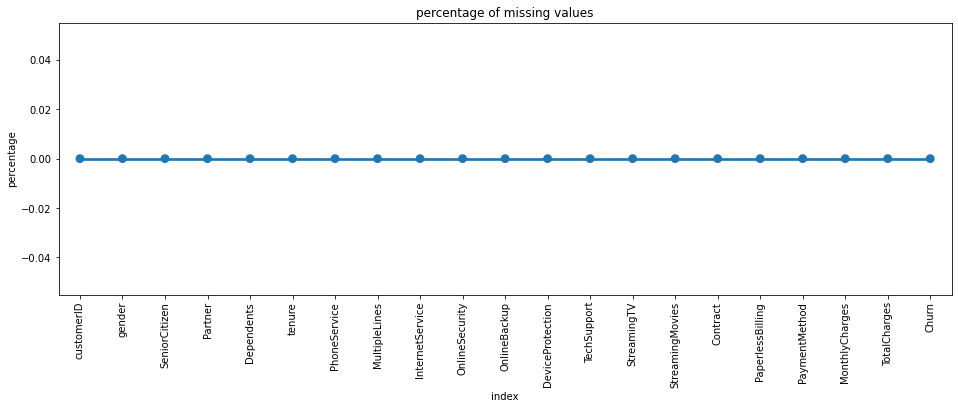

In [13]:
missing=pd.DataFrame((cust_df.isnull().sum())*100/cust_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation='vertical') # to set the label of x-axis
plt.ylabel('percentage')
plt.title('percentage of missing values')
plt.show()

# here we don't have any missing values,but in cust_df.info() we saw that Monthly charges are float but total charges are object dtype so we can't say that 100 % there are no any null values in total charges firstly convert the object dtype in numeric dtype

In [14]:

cust_df.TotalCharges=pd.to_numeric(cust_df.TotalCharges,errors='coerce')

In [15]:
cust_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

NOw on converting the datatype of TotalCharges we can see it contain 11 null values

# Now deal with these 11 null values

In [16]:
cust_df.dropna(how='any',inplace=True)

In [17]:
cust_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
cust_df['tenure'].max()

72

 As we have seen that tenure having integer (unique  72 values ) so it will be so hactic to analyse 72 values so wewill try to make a tenure_group means a bin in such a way for e.g. if tenure<12 assign a [1 - 12] tenure group

In [19]:
# group a tenure in bin of 12 months
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
cust_df['tenure_gp']=pd.cut(cust_df.tenure,range(1,80,12),right=False,labels=labels)

# cut fuction 

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)[source]

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

Parameters

xarray-like
The input array to be binned. Must be 1-dimensional.

binsint, sequence of scalars, or IntervalIndex

The criteria to bin by.

int : Defines the number of equal-width bins in the range of x. The range of x is extended by .1% on each side to include the minimum and maximum values of x.

sequence of scalars : Defines the bin edges allowing for non-uniform width. No extension of the range of x is done.

IntervalIndex : Defines the exact bins to be used. Note that IntervalIndex for bins must be non-overlapping.

rightbool, default True

Indicates whether bins includes the rightmost edge or not. If right == True (the default), then the bins [1, 2, 3, 4] indicate (1,2], (2,3], (3,4]. This argument is ignored when bins is an IntervalIndex.

labelsarray or False, default None
                                                                                                                                              
Specifies the labels for the returned bins. Must be the same length as the resulting bins. If False, returns only integer indicators of the bins. This affects the type of the output container (see below). This argument is ignored when bins is an IntervalIndex. If True, raises an error. When ordered=False, labels must be provided.

In [20]:
cust_df['tenure_gp'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_gp, dtype: int64

In [21]:
cust_df.drop(['tenure','customerID'],axis=1,inplace=True)

In [22]:
cust_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


AS we have tenure_gp so now no use of tenure so we will drop it and in our project for finding curners ,there is no any requirement of customer_id we have dropped it also.

# Data Exploration

plot the distribution of individual predictors by churn

# Univariate Analysis

I will use countplot here .

seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None)

Parameters : This method is accepting the following parameters that are described below: 
 

x, y: This parameter take names of variables in data or vector data, optional, Inputs for plotting long-form data.

hue : (optional) This parameter take column name for colour encoding.

data : (optional) This parameter take DataFrame, array, or list of arrays, Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

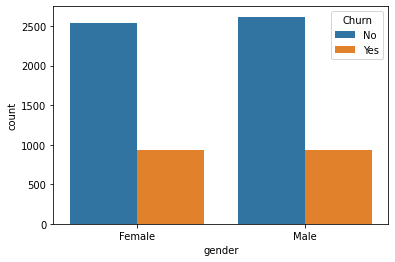

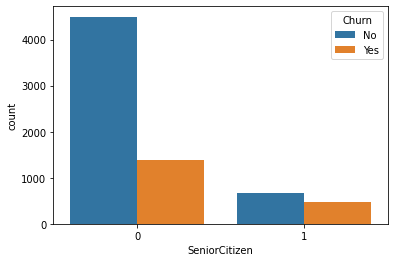

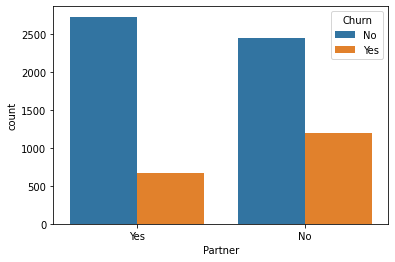

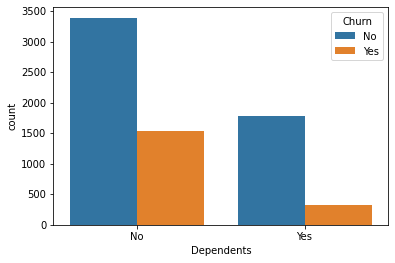

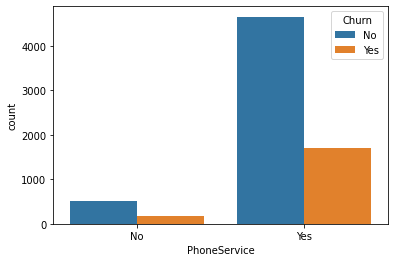

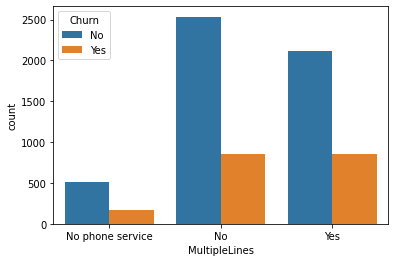

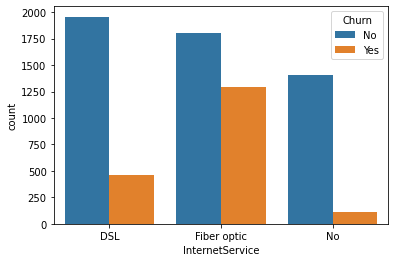

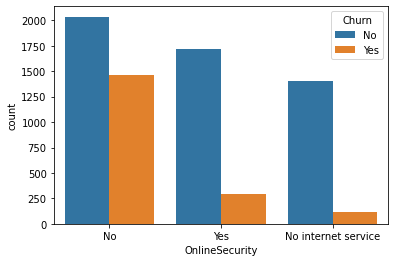

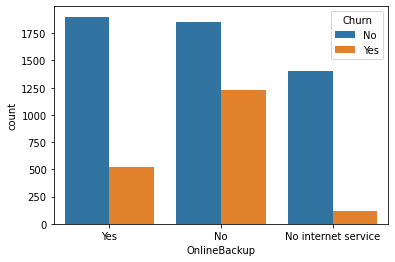

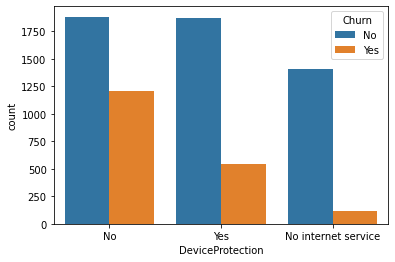

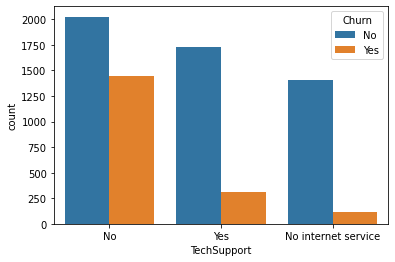

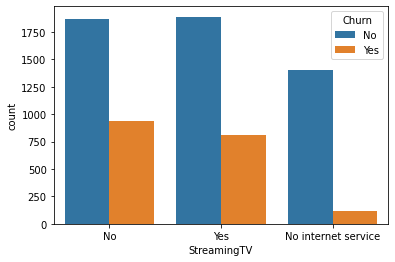

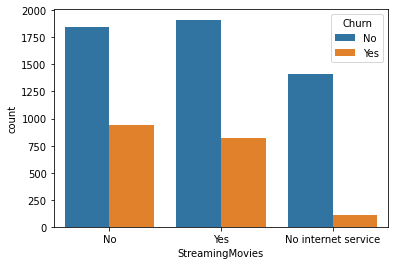

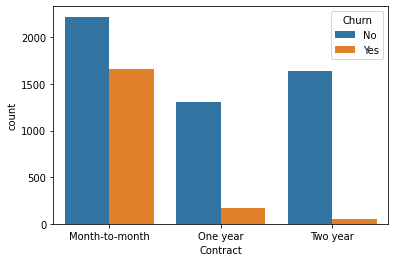

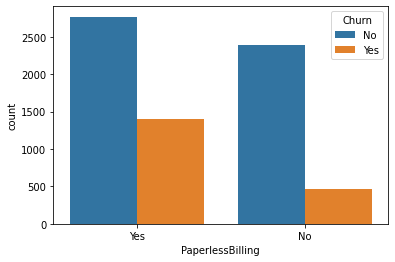

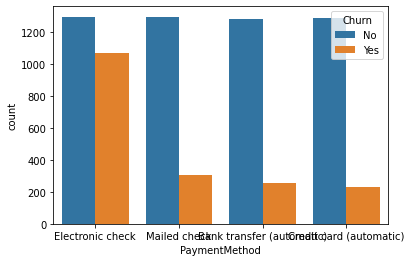

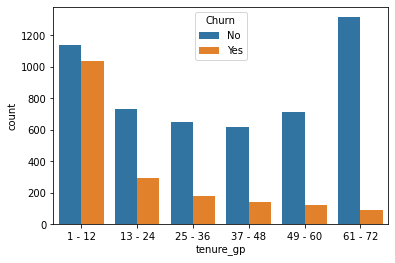

In [23]:
for i , predictors in enumerate(cust_df.drop(['Churn','TotalCharges','MonthlyCharges'],axis=1)):
    plt.figure(i)
    sns.countplot(data=cust_df,x=predictors,hue='Churn')

following insights generated:
1. for gender we can see for both male and female distribution is  similar that its not a  that much important factor.

2.  In 2nd graph 0 means non seniorcitizen and 1 mean SenioCitizen here we can easily the ratio  of churner and non churner for senior citizen is very high almost 40% so basically possibility of churning out is more in case odf senior citizen.

3. in 3rd graph  we can see churner ratio is high if they don't have any partner as compared customer having partner

4. In case of dependence less pssibility of churning out when you are dependent means possibility of churning out is more 

5. people having phone service are more likely to churn.

 so by visualisation of graph we can easily understand and can find out more inights easily 
 As in last 2nd graph of payment method we can see Electronic check (more churners) so this is also a important factor.

Now we will convert target variable'Churn' to a binary numeric variable

In [24]:
cust_df['Churn'].replace(['No','Yes'],[0,1],inplace=True)
cust_df


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


# Now we will check the relationship between monthly charges and total charges .

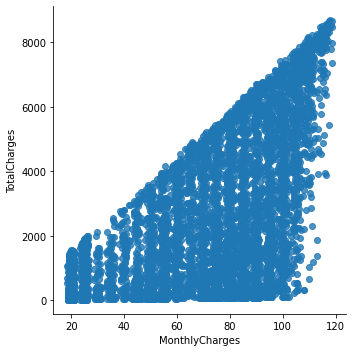

In [25]:
sns.lmplot(data=cust_df,x='MonthlyCharges',y='TotalCharges',fit_reg=False)


total charges increases as monthly charges increases as expected , we can correlation between monthly and total charges is high

# now before converting other categorical feature's data into numerical data first understand what is problem with label encoding:


As machine able to understand numerical interpretation for Ex if there are following Cities as feature of any ML
Spain,Jaipur,delhi,Mumbai and we encode as Spain:1

jaipur:2

delhi;3

Mumbai:4

then machine can interpret it in such a way that it can give more priorty to'4' means mumbai that means it can effect our prediction of ML wrongly so ,

for this there is a concept of  ONE HOT ENCODING ,DUMMY TRAP 
here we will use get Dummy

# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

syntax:  pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

Parameters:

data: whose data is to be manipulated.

prefix: String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Default value is None.

prefix_sep: Separator/delimiter to use if appending any prefix. Default is ‘_’

dummy_na: It adds a column to indicate NaN values, default value is false, If false NaNs are ignored.

columns: Column names in the DataFrame that needs to be encoded. Default value is None, If columns is None then all the columns with object or category dtype will be converted.

sparse: It  specify whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False). default value is False.

drop_first: Remove first level to get k-1 dummies out of k categorical levels.

dtype: Data type for new columns. Only a single dtype is allowed. Default value is np.uint8.
Returns: Dataframe (Dummy-coded data)

In [26]:

cust_df_dummies=pd.get_dummies(cust_df)

cust_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_gp_1 - 12,tenure_gp_13 - 24,tenure_gp_25 - 36,tenure_gp_37 - 48,tenure_gp_49 - 60,tenure_gp_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [27]:
from sklearn import linear_model

In [28]:
x=cust_df_dummies.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_gp_1 - 12,tenure_gp_13 - 24,tenure_gp_25 - 36,tenure_gp_37 - 48,tenure_gp_49 - 60,tenure_gp_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [30]:
y=cust_df_dummies.Churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [32]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
clf.predict(x_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
y_pre=clf.predict(x_test)
y_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
clf.score(x_train,y_train)

0.8061763510767981

In [36]:
clf.score(x_test,y_test)

0.7928909952606635

In [37]:
clf.predict_proba(x_train) 

array([[0.82873351, 0.17126649],
       [0.61922574, 0.38077426],
       [0.28498844, 0.71501156],
       ...,
       [0.94444424, 0.05555576],
       [0.89136509, 0.10863491],
       [0.93085616, 0.06914384]])

# let try to check its accuracy by Decision tree

In [38]:
from sklearn import tree 
clf=tree.DecisionTreeClassifier()

In [39]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
clf.score(x_train,y_train)

0.9975619666802112

# Acuuracy of training data is much better than training data by logistic regression

In [41]:
clf.score(x_test,y_test)

0.7175355450236967

# but accuracy for testing data is better by logistic regression approx 7% more than decision tree accuracy

# we have created a model which will predict wether the customer will churn out or not 